In [18]:
from pandas import read_csv
data = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.csv', header=None, na_values = "?")

In [23]:
# to show the number of rows with missing values for each column
for i in range(data.shape[1]): 
    missing = data[[i]].isnull().sum() #count number of rows with missing values 
    missing_perc = missing / data.shape[0]*100
    print('> %d, Missing : %d (%.1f%%)' % (i,missing, missing_perc))

> 0, Missing : 1 (0.3%)
> 1, Missing : 0 (0.0%)
> 2, Missing : 0 (0.0%)
> 3, Missing : 60 (20.0%)
> 4, Missing : 24 (8.0%)
> 5, Missing : 58 (19.3%)
> 6, Missing : 56 (18.7%)
> 7, Missing : 69 (23.0%)
> 8, Missing : 47 (15.7%)
> 9, Missing : 32 (10.7%)
> 10, Missing : 55 (18.3%)
> 11, Missing : 44 (14.7%)
> 12, Missing : 56 (18.7%)
> 13, Missing : 104 (34.7%)
> 14, Missing : 106 (35.3%)
> 15, Missing : 247 (82.3%)
> 16, Missing : 102 (34.0%)
> 17, Missing : 118 (39.3%)
> 18, Missing : 29 (9.7%)
> 19, Missing : 33 (11.0%)
> 20, Missing : 165 (55.0%)
> 21, Missing : 198 (66.0%)
> 22, Missing : 1 (0.3%)
> 23, Missing : 0 (0.0%)
> 24, Missing : 0 (0.0%)
> 25, Missing : 0 (0.0%)
> 26, Missing : 0 (0.0%)
> 27, Missing : 0 (0.0%)


### Simple Imputer

In [29]:
from pandas import read_csv
from numpy import isnan
from sklearn.impute import SimpleImputer
data = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.csv', header=None, na_values = "?")

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [30]:
data = data.values

In [31]:
ix = [i for i in range(data.shape[1]) if i != 23]
X,y = data[:,ix], data[:,23]

In [32]:
print('Missing: %d' % sum(isnan(X).flatten()))

Missing: 1605


In [33]:
imputer = SimpleImputer(strategy ='mean')

In [34]:
imputer.fit(X)
Xtrans = imputer.transform(X)
print('Missing : %d' % sum(isnan(Xtrans).flatten()))

Missing : 0


### Using Simple imputer in a pipeline to model 

In [40]:
from numpy import std
from numpy import mean
from pandas import read_csv 
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline 

In [41]:
data = read_csv ('https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.csv', header=None, na_values = "?")

In [45]:
data = data.values
ix = [i for i in range(data.shape[1]) if i != 23]
X,y = data[:,ix],data[:,23]

In [46]:
model = RandomForestClassifier()
Imputer = SimpleImputer(strategy= 'mean')
pipeline = Pipeline(steps = [('i', Imputer),('m', model)])

In [48]:
cv = RepeatedStratifiedKFold(n_splits= 10, n_repeats= 3, random_state= 1)

In [49]:
scores = cross_val_score(pipeline,X,y,scoring= 'accuracy', cv = cv, n_jobs= 1)
print('Mean accuracy : %.3f (%.3f)' % (mean(scores),std(scores)))

Mean accuracy : 0.857 (0.050)


### trying different Imputers 

In [51]:
data = read_csv ('https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.csv', header=None, na_values = "?")

In [54]:
df = data.values
ix = [i for i in range(df.shape[1]) if i != 23]
X,y = df[:,ix],df[:,23]

In [56]:
results = list()
imput_strat = ['mean','median','constant']
for s in imput_strat:
    pipeline = Pipeline(steps = [('i', SimpleImputer(strategy = s)), ('m', RandomForestClassifier())])
    cv = RepeatedStratifiedKFold(n_splits= 10, n_repeats= 3, random_state= 1)
    scores = cross_val_score(pipeline,X,y , scoring= 'accuracy',cv= cv,n_jobs= -1)
    results.append(scores)
    print('>%s %.3f (%.3f)' % (s,mean(scores), std(scores)))

>mean 0.858 (0.056)
>median 0.874 (0.061)
>constant 0.879 (0.051)


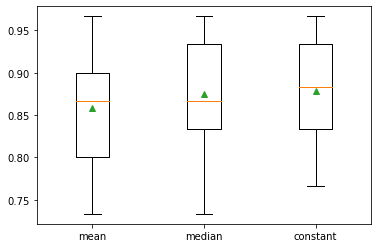

In [58]:
from matplotlib import pyplot
pyplot.boxplot(results, labels =imput_strat, showmeans = True )
pyplot.show()